In [1]:
#Dependencies
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
from us import states
import gmaps
import config as conf
import scipy.stats as stats
gmaps.configure(conf.api_key)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Set all the figures on same size
pylab.rcParams['figure.figsize'] = (10, 5)

In [3]:
#Open/read CSV file and look at table head()
death_pd_base = pd.read_csv("Causes_of_Death.csv")
death_pd_base.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


In [4]:
#Create table with mean of Age-adjusted death rates per cause from 1999-2016
#Drop "All causes" to focus on 10 leading causes
ppcauses = death_pd_base.groupby(["Year", "Cause Name"]).mean()["Age-adjusted Death Rate"].unstack(level=-1)
leadcause = ppcauses.drop("All causes", axis=1)
means = leadcause.mean()
leadcause = pd.DataFrame(means).reset_index()
leadcause.columns = ["Cause Name", "Rate"]
leadcause.sort_values("Rate",inplace=True)
leadcause

,Cause Name,Rate
8,Suicide,13.235470
6,Kidney disease,14.139423
5,Influenza and pneumonia,18.389103
3,Diabetes,23.471902
0,Alzheimer's disease,24.618697
9,Unintentional injuries,42.827671
1,CLRD,44.644658
7,Stroke,46.358333
2,Cancer,179.898825
4,Heart disease,199.782372


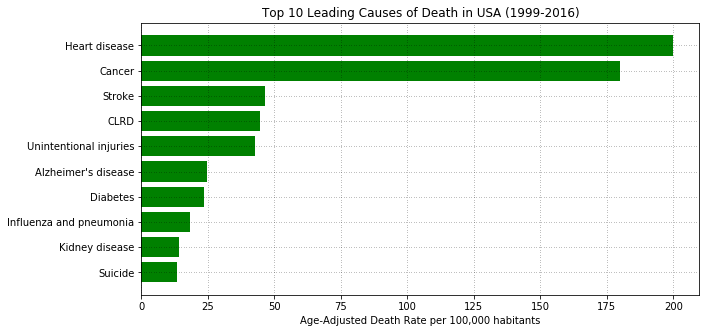

In [5]:
#Create a horizontal bar plot with descending order to show top 10 leading causes of death in USA
x = leadcause["Cause Name"]
y = leadcause["Rate"]

plt.barh(x, y, color='green', alpha=1, align="center")
plt.title("Top 10 Leading Causes of Death in USA (1999-2016)")
plt.xlabel("Age-Adjusted Death Rate per 100,000 habitants")
plt.grid(linestyle='--', dashes=(1, 4), linewidth=0.5, color='black')
plt.savefig("Leading Causes of Death USA.png")
plt.show()

In [6]:
#Group the years and plot the trend of the diseases in each group of years
bins = [1998, 2004, 2010, 2016]
group_names = ["1999-2004", "2005-2010", "2011-2016"]

death_pd_base["Year Range"] =pd.cut(death_pd_base["Year"], bins, labels=group_names)
deaths_year = death_pd_base.groupby(["Year Range", "Cause Name"]).mean()["Age-adjusted Death Rate"].unstack(level=-1)
deaths_year = deaths_year.drop("All causes", axis=1)
deaths_year

Cause Name,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
Year Range,,,,,,,,,,
1999-2004,21.262500,45.441987,195.663782,25.737500,238.522115,22.426282,14.101603,58.175321,12.061538,39.785577
2005-2010,25.602564,44.661218,179.497756,23.044872,191.837500,17.497436,15.067308,43.525962,12.886859,42.754808
2011-2016,26.991026,43.830769,164.534936,21.633333,168.987500,15.243590,13.249359,37.373718,14.758013,45.942628


In [7]:
deaths_year2 = death_pd_base.groupby(["Year", "Cause Name"]).mean()["Age-adjusted Death Rate"].unstack(level=-1)
deaths_year2 = deaths_year2.drop("All causes", axis=1)
deaths_year2.head()

Cause Name,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
Year,,,,,,,,,,
1999,17.484615,47.017308,201.450000,25.553846,256.267308,24.278846,13.030769,62.834615,11.738462,38.236538
2000,19.486538,45.780769,200.176923,25.580769,249.746154,23.255769,13.748077,61.573077,11.682692,38.378846
2001,20.773077,45.478846,197.732692,25.838462,242.017308,21.530769,14.150000,59.194231,12.100000,39.184615
2002,22.594231,45.778846,194.996154,26.167308,237.171154,23.001923,14.369231,58.273077,12.313462,40.359615
2003,23.442308,45.400000,191.963462,26.073077,230.311538,22.705769,14.726923,55.623077,12.188462,41.121154


In [8]:
deaths_Heart_Cancer2 = deaths_year2[["Heart disease","Cancer"]]
deaths_Heart_Cancer2.head()

Cause Name,Heart disease,Cancer
Year,,
1999,256.267308,201.450000
2000,249.746154,200.176923
2001,242.017308,197.732692
2002,237.171154,194.996154
2003,230.311538,191.963462


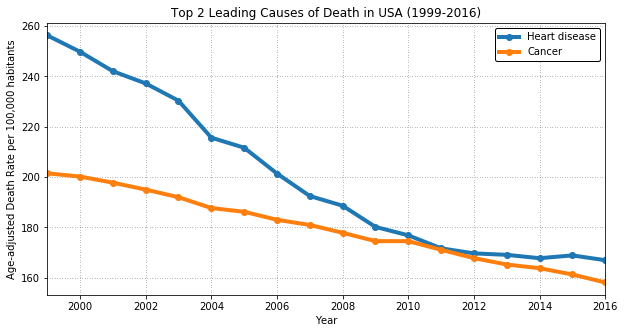

In [9]:
deaths_Heart_Cancer2.plot(kind="line", marker ='o', alpha=1, linewidth=4)
plt.title("Top 2 Leading Causes of Death in USA (1999-2016)")
plt.xlabel("Year")
plt.ylabel("Age-adjusted Death Rate per 100,000 habitants")
plt.legend(loc='best', framealpha=1, edgecolor='k')
plt.grid(linestyle='--', dashes=(1, 4), linewidth=0.5, color='black')
plt.savefig("Top 2 Leading Causes of Death USA.png")
plt.show()

In [10]:
deaths_others2 = deaths_year2[["Alzheimer's disease", "CLRD", "Diabetes", "Influenza and pneumonia",\
                             "Kidney disease", "Stroke", "Suicide", "Unintentional injuries"]]
deaths_others2.head()

Cause Name,Alzheimer's disease,CLRD,Diabetes,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
Year,,,,,,,,
1999,17.484615,47.017308,25.553846,24.278846,13.030769,62.834615,11.738462,38.236538
2000,19.486538,45.780769,25.580769,23.255769,13.748077,61.573077,11.682692,38.378846
2001,20.773077,45.478846,25.838462,21.530769,14.150000,59.194231,12.100000,39.184615
2002,22.594231,45.778846,26.167308,23.001923,14.369231,58.273077,12.313462,40.359615
2003,23.442308,45.400000,26.073077,22.705769,14.726923,55.623077,12.188462,41.121154


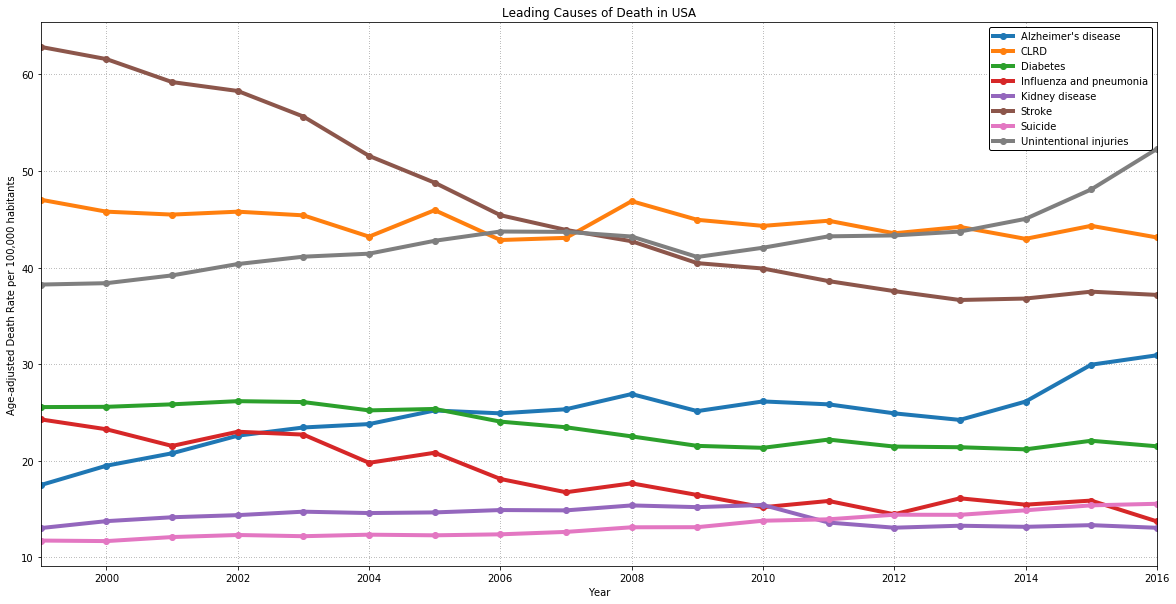

In [11]:
deaths_others2.plot(kind="line", marker ='o', alpha=1, linewidth=4, figsize=(20,10))
plt.title("Leading Causes of Death in USA")
plt.xlabel("Year")
plt.ylabel("Age-adjusted Death Rate per 100,000 habitants")
plt.legend(loc='best', framealpha=1, edgecolor='k')
plt.grid(linestyle='--', dashes=(1, 4), linewidth=0.5, color='black')
plt.savefig("Bottom 8 Leading Causes of Death USA.png")
plt.show()

# Null Hypothesis #1

-The trend observed on the decrease of death rate for Heart disease and Cancer (meaning, the decrease on age-adjusted death rate per 100,000 habitants) does not represent a significant improvement throught the years.

In [12]:
#Test the null hypothesis "Heart" with ANOVA test
deaths_Heart = deaths_year2[["Heart disease"]]
dH = deaths_Heart.reset_index()
dH.head()

Cause Name,Year,Heart disease
0,1999,256.267308
1,2000,249.746154
2,2001,242.017308
3,2002,237.171154
4,2003,230.311538


In [13]:
bins = [1998, 2004, 2010, 2016]
group_names = ["1999-2004", "2005-2010", "2011-2016"]

dH["Year Range"] = pd.cut(dH["Year"], bins, labels=group_names)
dH.head()

Cause Name,Year,Heart disease,Year Range
0,1999,256.267308,1999-2004
1,2000,249.746154,1999-2004
2,2001,242.017308,1999-2004
3,2002,237.171154,1999-2004
4,2003,230.311538,1999-2004


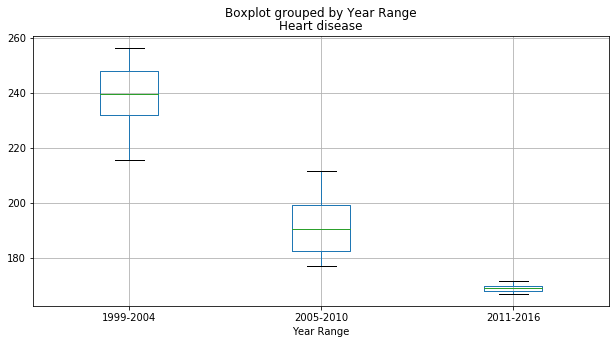

In [14]:
dH.boxplot("Heart disease", by="Year Range", figsize=(10,5))

In [15]:
group1hd = dH[dH["Year Range"] == "1999-2004"]["Heart disease"]
group2hd = dH[dH["Year Range"] == "2005-2010"]["Heart disease"]
group3hd = dH[dH["Year Range"] == "2011-2016"]["Heart disease"]

stats.f_oneway(group1hd, group2hd, group3hd)

F_onewayResult(statistic=59.02123176539099, pvalue=7.776019794385112e-08)

In [16]:
#Test the null hypothesis "Cancer" with ANOVA test
deaths_Cancer = deaths_year2[["Cancer"]]
dC = deaths_Cancer.reset_index()
dC.head()

Cause Name,Year,Cancer
0,1999,201.450000
1,2000,200.176923
2,2001,197.732692
3,2002,194.996154
4,2003,191.963462


In [17]:
bins = [1998, 2004, 2010, 2016]
group_names = ["1999-2004", "2005-2010", "2011-2016"]

dC["Year Range"] = pd.cut(dC["Year"], bins, labels=group_names)
dC.head()

Cause Name,Year,Cancer,Year Range
0,1999,201.450000,1999-2004
1,2000,200.176923,1999-2004
2,2001,197.732692,1999-2004
3,2002,194.996154,1999-2004
4,2003,191.963462,1999-2004


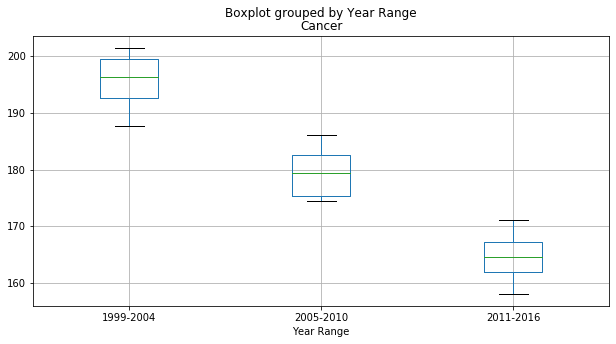

In [18]:
dC.boxplot("Cancer", by="Year Range", figsize=(10, 5))

In [19]:
group1c = dC[dC["Year Range"] == "1999-2004"]["Cancer"]
group2c = dC[dC["Year Range"] == "2005-2010"]["Cancer"]
group3c = dC[dC["Year Range"] == "2011-2016"]["Cancer"]

stats.f_oneway(group1c, group2c, group3c)

F_onewayResult(statistic=61.63588714863557, pvalue=5.823484514575891e-08)

In [20]:
#Create a table showing data per year on each State during 1999-2016
by_state= death_pd_base[['State','Cause Name','Year','Deaths']]
state_grouped= by_state.groupby(['State', 'Cause Name'])
state_grouped.first()

Year  Deaths
State         Cause Name                           
Alabama       All causes               2014   50215
              Alzheimer's disease      1999     772
              CLRD                     2000    2057
              Cancer                   2016   10419
              Diabetes                 2016    1183
              Heart disease            2016   12832
              Influenza and pneumonia  2016     987
              Kidney disease           2016    1012
              Stroke                   2013    2604
              Suicide                  2003     521
              Unintentional injuries   2012    2283
Alaska        All causes               2013    3997
              Alzheimer's disease      1999      24
              CLRD                     2015     204
              Cancer                   2016     995
              Diabetes                 2009      84
              Heart disease            2013     706
              Influenza and pneumonia  2015      41
              Kidney disease           2002      21
              Stroke                   2014     157
              Suicide                  2001     102
              Unintentional injuries   2005     313
Arizona       All causes               2014   51538
              Alzheimer's disease      1999     963
              CLRD                     2014    3396
              Cancer                   2016   11876
              Diabetes                 2009    1083
              Heart disease            2014   10805
              Influenza and pneumonia  2015     775
              Kidney disease           2014     325
...                                     ...     ...
West Virginia Cancer                   2016    4659
              Diabetes                 2012     741
              Heart disease            2016    4767
              Influenza and pneumonia  2016     423
              Kidney disease           1999     345
              Stroke                   2013     983
              Suicide                  1999     229
              Unintentional injuries   1999     798
Wisconsin     All causes               2009   45697
              Alzheimer's disease      2000    1177
              CLRD                     2012    2524
              Cancer                   2016   11498
              Diabetes                 2009    1110
              Heart disease            2016   11526
              Influenza and pneumonia  2016     888
              Kidney disease           1999     677
              Stroke                   2016    2481
              Suicide                  2000     590
              Unintentional injuries   1999    1955
Wyoming       All causes               2016    4722
              Alzheimer's disease      2013     126
              CLRD                     2016     327
              Cancer                   2015     931
              Diabetes                 2013      89
              Heart disease            2013     939
              Influenza and pneumonia  2016      99
              Kidney disease           1999      30
              Stroke                   2014     189
              Suicide                  2001      83
              Unintentional injuries   2004     243

[572 rows x 2 columns]

In [21]:
#Create a table with mean of age-adjusted rate per State and disease during 1999-2016 period
death_pd= death_pd_base[death_pd_base['Cause Name'] != 'All causes']
by_state_adr= death_pd[['State','Cause Name','Year','Age-adjusted Death Rate']]
grouped= by_state.groupby(['State', 'Cause Name'])

grouped.first()
by_state_adr=pd.DataFrame(death_pd[['State','Cause Name','Age-adjusted Death Rate']])
death_by_state_adr= death_pd.groupby(["State","Cause Name"]).mean()["Age-adjusted Death Rate"].unstack(level=-1)
death_by_state_adr2 = death_by_state_adr.drop("United States")
death_by_state_adr2.head()

Cause Name,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
State,,,,,,,,,,
Alabama,30.544444,52.216667,196.150000,26.766667,256.183333,21.233333,21.205556,58.566667,13.088889,50.794444
Alaska,21.677778,43.794444,179.105556,22.261111,162.661111,14.338889,10.605556,48.572222,21.605556,56.500000
Arizona,31.238889,45.294444,158.483333,21.344444,171.805556,17.016667,8.505556,38.144444,16.594444,48.855556
Arkansas,25.916667,53.483333,198.750000,26.222222,242.627778,24.022222,19.911111,59.583333,15.111111,48.550000
California,26.094444,39.005556,161.994444,21.538889,187.833333,20.233333,7.761111,46.294444,9.855556,29.522222


In [22]:
state_Heart = death_by_state_adr2[["Heart disease"]]
state_HD = state_Heart.reset_index()
state_HD.head()

Cause Name,State,Heart disease
0,Alabama,256.183333
1,Alaska,162.661111
2,Arizona,171.805556
3,Arkansas,242.627778
4,California,187.833333


In [23]:
state_HD = state_HD.sort_values("Heart disease", ascending=False)
state_HD2 = state_HD.iloc[0:10]
state_HD2

Cause Name,State,Heart disease
24,Mississippi,279.661111
36,Oklahoma,261.305556
0,Alabama,256.183333
8,District of Columbia,250.450000
18,Louisiana,244.083333
3,Arkansas,242.627778
48,West Virginia,241.622222
17,Kentucky,240.916667
42,Tennessee,238.888889
32,New York,230.577778


In [24]:
coordinatesHD = [
    (32.741646, -89.678696),
    (35.565342, -96.928917),
    (32.806671, -86.791130),
    (38.897438, -77.026817),
    (31.169546, -91.867805),
    (34.969704, -92.373123),
    (38.491226, -80.954453),
    (37.668140, -84.670067),
    (35.747845, -86.692345),
    (42.165726, -74.948051)
]

figure_layout = {
   'width': '1000px',
   'height': '500px',
   'border': '1px solid black',
   'padding': '1px',
   'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
markers = gmaps.marker_layer(coordinatesHD)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [25]:
state_Cancer = death_by_state_adr2[["Cancer"]]
state_C = state_Cancer.reset_index()
state_C.head()

Cause Name,State,Cancer
0,Alabama,196.150000
1,Alaska,179.105556
2,Arizona,158.483333
3,Arkansas,198.750000
4,California,161.994444


In [26]:
state_C = state_C.sort_values("Cancer", ascending=False)
state_C2 = state_C.iloc[0:10]
state_C2

Cause Name,State,Cancer
17,Kentucky,211.516667
24,Mississippi,205.605556
18,Louisiana,204.127778
48,West Virginia,204.088889
8,District of Columbia,200.083333
42,Tennessee,199.711111
3,Arkansas,198.750000
0,Alabama,196.150000
14,Indiana,194.516667
36,Oklahoma,194.216667


In [27]:
coordinatesC = [
    (32.741646, -89.678696),
    (35.565342, -96.928917),
    (32.806671, -86.791130),
    (38.897438, -77.026817),
    (31.169546, -91.867805),
    (34.969704, -92.373123),
    (38.491226, -80.954453),
    (37.668140, -84.670067),
    (35.747845, -86.692345),
    (39.849426, -86.258278)
]

figure_layout = {
   'width': '1000px',
   'height': '500px',
   'border': '1px solid black',
   'padding': '1px',
   'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
markers = gmaps.marker_layer(coordinatesC)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [28]:
state_Alz = death_by_state_adr2[["Alzheimer's disease"]]
state_Alz = state_Alz.reset_index()
state_Alz.head()

Cause Name,State,Alzheimer's disease
0,Alabama,30.544444
1,Alaska,21.677778
2,Arizona,31.238889
3,Arkansas,25.916667
4,California,26.094444


In [29]:
state_Alz = state_Alz.sort_values("Alzheimer's disease", ascending=False)
state_Alz2 = state_Alz.iloc[0:10]
state_Alz2

Cause Name,State,Alzheimer's disease
47,Washington,40.705556
34,North Dakota,34.072222
42,Tennessee,33.405556
40,South Carolina,32.916667
18,Louisiana,31.766667
2,Arizona,31.238889
0,Alabama,30.544444
41,South Dakota,29.438889
17,Kentucky,29.288889
37,Oregon,28.944444


In [30]:
coordinatesAlz = [
    (47.400902, -121.490494),
    (47.528912, -99.784012),
    (35.747845, -86.692345),
    (33.856892, -80.945007),
    (31.169546, -91.867805),
    (33.729759, -111.431221),
    (32.806671, -86.791130),
    (44.299782, -99.438828),
    (37.668140, -84.670067),
    (44.572021, -122.070938)
]

figure_layout = {
   'width': '1000px',
   'height': '500px',
   'border': '1px solid black',
   'padding': '1px',
   'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
markers = gmaps.marker_layer(coordinatesAlz)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

# Null Hypothesis #2

-The death rate due to suicide is not significantly related to states with lower temperatures throught the year.

In [31]:
#Create a table with mean of age-adjusted rate per State and suicide
death_group_df = death_pd_base.groupby(["State", "Cause Name"]).mean()["Age-adjusted Death Rate"].unstack(level=-1)
death_suicide_df = death_group_df["Suicide"]
death_suicide_df = death_suicide_df.drop("United States")
death_suicide_df = pd.DataFrame(death_suicide_df).reset_index()
death_suicide_df.head()

,State,Suicide
0,Alabama,13.088889
1,Alaska,21.605556
2,Arizona,16.594444
3,Arkansas,15.111111
4,California,9.855556


In [32]:
# Taken from https://inkplant.com/code/state-latitudes-longitudes, nearly state centroid
coord_states = {"Alabama": [32.806671, -86.791130], "Alaska": [61.370716, -152.404419],
"Arizona": [33.729759, -111.431221], "Arkansas": [34.969704, -92.373123],
"California": [36.116203, -119.681564], "Colorado": [39.059811, -105.311104],
"Connecticut": [41.597782, -72.755371], "Delaware": [39.318523, -75.507141],
"District of Columbia": [38.897438, -77.026817], "Florida": [27.766279, -81.686783],
"Georgia": [33.040619, -83.643074], "Hawaii": [21.094318, -157.498337],
"Idaho": [44.240459, -114.478828], "Illinois": [40.349457, -88.986137],
"Indiana": [39.849426, -86.258278], "Iowa": [42.011539, -93.210526],
"Kansas": [38.526600, -96.726486], "Kentucky": [37.668140, -84.670067],
"Louisiana": [31.169546, -91.867805], "Maine": [44.693947, -69.381927],
"Maryland": [39.063946, -76.802101], "Massachusetts": [42.230171, -71.530106],
"Michigan": [43.326618, -84.536095], "Minnesota": [45.694454, -93.900192],
"Mississippi": [32.741646, -89.678696], "Missouri": [38.456085, -92.288368],
"Montana": [46.921925, -110.454353], "Nebraska": [41.125370, -98.268082],
"Nevada": [38.313515, -117.055374], "New Hampshire": [43.452492, -71.563896],
"New Jersey": [40.298904, -74.521011], "New Mexico": [34.840515, -106.248482],
"New York": [42.165726, -74.948051], "North Carolina": [35.630066, -79.806419],
"North Dakota": [47.528912, -99.784012], "Ohio": [40.388783, -82.764915],
"Oklahoma": [35.565342, -96.928917], "Oregon": [44.572021, -122.070938],
"Pennsylvania": [40.590752, -77.209755], "Rhode Island": [41.680893, -71.511780],
"South Carolina": [33.856892, -80.945007], "South Dakota": [44.299782, -99.438828],
"Tennessee": [35.747845, -86.692345], "Texas": [31.054487, -97.563461],
"Utah": [40.150032, -111.862434], "Vermont": [44.045876, -72.710686],
"Virginia": [37.769337, -78.169968], "Washington": [47.400902, -121.490494],
"West Virginia": [38.491226, -80.954453], "Wisconsin": [44.268543, -89.616508],
"Wyoming": [42.755966, -107.302490]}

coord_states_df = pd.DataFrame(coord_states)
coord_states_df = coord_states_df.T.reset_index()
coord_states_df.columns = ["State", "Lat", "Lon"]
suicide_df = pd.merge(death_suicide_df, coord_states_df, on='State')
locations = suicide_df[["Lat", "Lon"]].astype(float)
suicides = suicide_df["Suicide"].astype(float)

suicide_df.head()

,State,Suicide,Lat,Lon
0,Alabama,13.088889,32.806671,-86.791130
1,Alaska,21.605556,61.370716,-152.404419
2,Arizona,16.594444,33.729759,-111.431221
3,Arkansas,15.111111,34.969704,-92.373123
4,California,9.855556,36.116203,-119.681564


In [33]:
coord_states1 = []
for state in coord_states:
    coord_states1.append(coord_states[state])

list_suicides = list(suicides)
int_suicides = []
for i in range(len(list_suicides)):
    int_suicides.append(int(list_suicides[i]))

In [34]:
#Create a heat map showing death rates for suicide
fig = gmaps.figure()

suicide_layer = gmaps.heatmap_layer(locations, weights=suicides)

#Adjust suicide_layer setting to help with heatmap dissipating on zoom
suicide_layer.dissipating = False
suicide_layer.max_intensity = 40
suicide_layer.point_radius = 5
suicide_layer.gradient = ['white','yellow','green']

suicides = list(suicides)
suicide1_layer = gmaps.symbol_layer(coord_states1, fill_color='red',
                                    stroke_color='red', scale=int_suicides)


fig.add_layer(suicide_layer)
fig.add_layer(suicide1_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
#Test the null hypothesis with ANOVA test?
# Taken from http://www.usa.com/rank/us--average-temperature--state-rank.htm, cleaned in excel
avg_temp_df = pd.read_csv("Average_Temperature_States.csv")
avg_temp_df = avg_temp_df.sort_values('State').reset_index()
del avg_temp_df['index']
avg_temp_df = avg_temp_df[["State", "Avg Temp"]]

stat = death_suicide_df['State']
suic = death_suicide_df['Suicide']
temp = avg_temp_df['Avg Temp']
cold_hot_df = pd.DataFrame()
cold_hot_df['State'] = stat
cold_hot_df['Suicide'] = suic
cold_hot_df['Avg Temp'] = temp

cold_df = cold_hot_df[cold_hot_df['Avg Temp'] <= 55]
cold_df.loc[:, 'Type State'] = 'Cold State'
hot_df = cold_hot_df[cold_hot_df['Avg Temp'] > 55]
hot_df.loc[:, 'Type State'] = 'Hot State'

suicide_sign_df = pd.concat([cold_df, hot_df])
suicide_sign_df = suicide_sign_df.sort_index()

suicide_sign_df.head(10)

C:\Users\Jose Luis\AppData\Local\Continuum\anaconda3\envs\PythonData37\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Jose Luis\AppData\Local\Continuum\anaconda3\envs\PythonData37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,State,Suicide,Avg Temp,Type State
0,Alabama,13.088889,62.68,Hot State
1,Alaska,21.605556,32.03,Cold State
2,Arizona,16.594444,65.97,Hot State
3,Arkansas,15.111111,60.09,Hot State
4,California,9.855556,61.17,Hot State
5,Colorado,17.244444,46.26,Cold State
6,Connecticut,8.655556,48.60,Cold State
7,Delaware,11.438889,54.48,Cold State
8,District of Columbia,5.683333,54.73,Cold State
9,Florida,13.438889,71.80,Hot State


F_onewayResult(statistic=0.021475903007916908, pvalue=0.8840911850460149)

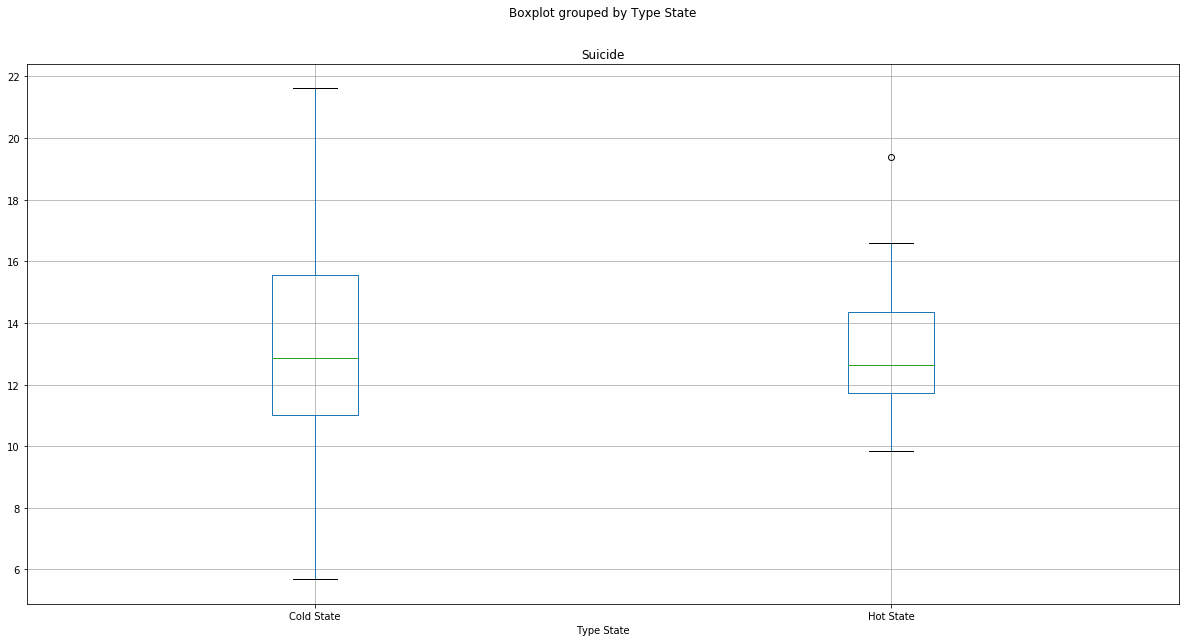

In [36]:
suicide_sign_df1 = suicide_sign_df[["Type State", "Suicide"]]
suicide_sign_df1.boxplot("Suicide", by="Type State", figsize=(20, 10))

#Individual groups
Cold = suicide_sign_df1[suicide_sign_df1["Type State"] == "Cold State"]["Suicide"]
Hot = suicide_sign_df1[suicide_sign_df1["Type State"] == "Hot State"]["Suicide"]

pd.options.mode.chained_assignment = None

#Perform the ANOVA
stats.f_oneway(Cold, Hot)

In [37]:
#Do a map with most common age-adjusted cause of death by state in these 15 years
most_common_causes_df = death_group_df[["Heart disease", "Cancer"]]
most_common_causes_df = most_common_causes_df.drop("United States")
most_common_causes_df = pd.DataFrame(most_common_causes_df).reset_index()
most_common_causes_df1 = pd.merge(coord_states_df, most_common_causes_df, on='State')
most_common_causes_df1.head()

,State,Lat,Lon,Heart disease,Cancer
0,Alabama,32.806671,-86.791130,256.183333,196.150000
1,Alaska,61.370716,-152.404419,162.661111,179.105556
2,Arizona,33.729759,-111.431221,171.805556,158.483333
3,Arkansas,34.969704,-92.373123,242.627778,198.750000
4,California,36.116203,-119.681564,187.833333,161.994444


In [38]:
#Set intervals for heart disease and cancer
bins_HD = [130, 180, 230, 280]
group_names2 = ["130-180", "181-230", "231-280"]
most_common_causes_df1["Heart disease Range"] = pd.cut(most_common_causes_df1["Heart disease"], bins_HD, labels=group_names2)

bins_cancer = [130, 160, 190, 220]
group_names1 = ["130-160", "161-190", "191-220"]
most_common_causes_df1["Cancer Range"] =pd.cut(most_common_causes_df1["Cancer"], bins_cancer, labels=group_names1)

most_common_causes_df1.head()

,State,Lat,Lon,Heart disease,Cancer,Heart disease Range,Cancer Range
0,Alabama,32.806671,-86.791130,256.183333,196.150000,231-280,191-220
1,Alaska,61.370716,-152.404419,162.661111,179.105556,130-180,161-190
2,Arizona,33.729759,-111.431221,171.805556,158.483333,130-180,130-160
3,Arkansas,34.969704,-92.373123,242.627778,198.750000,231-280,191-220
4,California,36.116203,-119.681564,187.833333,161.994444,181-230,161-190


In [39]:
# Most common diseases in US (Heart disease). Values by states
group1_hd_df1 = most_common_causes_df1[most_common_causes_df1['Heart disease Range'] == '231-280']
group2_hd_df1 = most_common_causes_df1[most_common_causes_df1['Heart disease Range'] == '181-230']
group3_hd_df1 = most_common_causes_df1[most_common_causes_df1['Heart disease Range'] == '130-180']

# Most common diseases in US (Cancer). Values by states
group1_c_df1 = most_common_causes_df1[most_common_causes_df1['Cancer Range'] == '191-220']
group2_c_df1 = most_common_causes_df1[most_common_causes_df1['Cancer Range'] == '161-190']
group3_c_df1 = most_common_causes_df1[most_common_causes_df1['Cancer Range'] == '130-160']

In [42]:
fig4 = gmaps.figure()

heart_group1_layer1 = gmaps.symbol_layer(group1_hd_df1[['Lat', 'Lon']], fill_color='red',
                                    stroke_color='red', scale=12)
heart_group2_layer1 = gmaps.symbol_layer(group2_hd_df1[['Lat', 'Lon']], fill_color=(255,165,20),
                                    stroke_color=(255,165,20), scale=8)
heart_group3_layer1 = gmaps.symbol_layer(group3_hd_df1[['Lat', 'Lon']], fill_color='yellow',
                                    stroke_color="yellow", scale=5)


#fig4.add_layer(heart_layer)
fig4.add_layer(heart_group1_layer1)
fig4.add_layer(heart_group2_layer1)
fig4.add_layer(heart_group3_layer1)
fig4

Figure(layout=FigureLayout(height='420px'))

In [43]:
fig5 = gmaps.figure()

cancer_group1_layer1 = gmaps.symbol_layer(group1_c_df1[['Lat', 'Lon']], fill_color='red',
                                    stroke_color='red', scale=12)
cancer_group2_layer1 = gmaps.symbol_layer(group2_c_df1[['Lat', 'Lon']], fill_color=(255,165,20),
                                    stroke_color=(255,165,20), scale=8)
cancer_group3_layer1 = gmaps.symbol_layer(group3_c_df1[['Lat', 'Lon']], fill_color='yellow',
                                    stroke_color='yellow', scale=5)



#fig3.add_layer(heart_layer)
fig5.add_layer(cancer_group1_layer1)
fig5.add_layer(cancer_group2_layer1)
fig5.add_layer(cancer_group3_layer1)
fig5

Figure(layout=FigureLayout(height='420px'))